In [2]:
%matplotlib ipympl
# Activate auto reload 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from pymatgen.core import Structure
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from scipy.interpolate import griddata
from matplotlib import colors
from matplotlib import rcParams
from copy import copy
import nglview
from ase.build import bulk
from ase.visualize import view
from ase.geometry import cell_to_cellpar
from ase import Atoms
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pyccapt.calibration.reconstructions import sdm, rdf, fft
from pyccapt.calibration.reconstructions import density_map
from pyccapt.calibration.reconstructions import crystal_helper
from pyccapt.calibration.data_tools import data_tools, data_loadcrop
from pyccapt.calibration.leap_tools import ccapt_tools

In [6]:
# Import necessary libraries

structure = Structure.from_file('Al.cif')
structure.make_supercell([10,10,10])

# print("Atomic coordinates:")
# print(structure)
# for i, site in enumerate(structure.sites):
#     print(f"  Site {i + 1}: {site.species_string} at {site.coords} (Cartesian)")
view_ngl = nglview.show_pymatgen(structure)

view_ngl.add_unitcell()
# view_ngl.camera = "perspective"
view_ngl.camera = "orthographic"
# Display the structure
# view_ngl.control.spin([0, 1, 0], 0)  # Rotation around z-axis


view_ngl.shape.add_arrow([-4, -4, -4], [0, -4, -4], [1, 0, 0], 0.5, "x-axis")
view_ngl.shape.add_arrow([-4, -4, -4], [-4, 0, -4], [0, 1, 0], 0.5, "y-axis")
view_ngl.shape.add_arrow([-4, -4, -4], [-4, -4, 0], [0, 0, 1], 0.5, "z-axis")
view_ngl.display()


NGLWidget()

In [7]:
coords = structure.cart_coords

The number of ions is:  4000


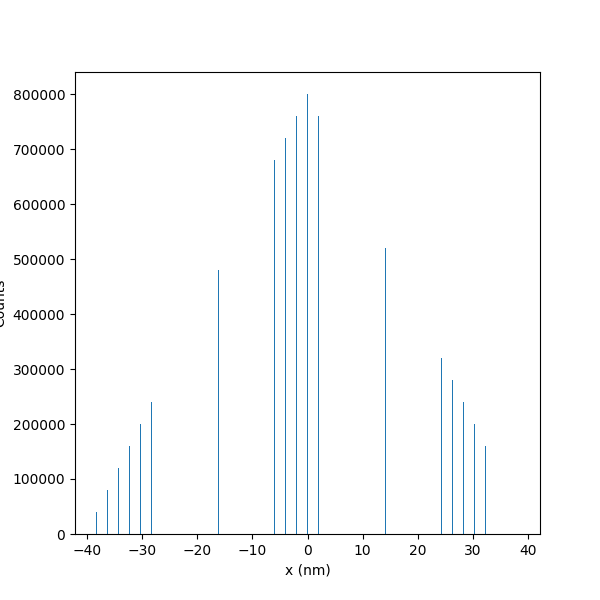

Cropping the data based on the reference point and box dimensions.
The number of ions is:  108


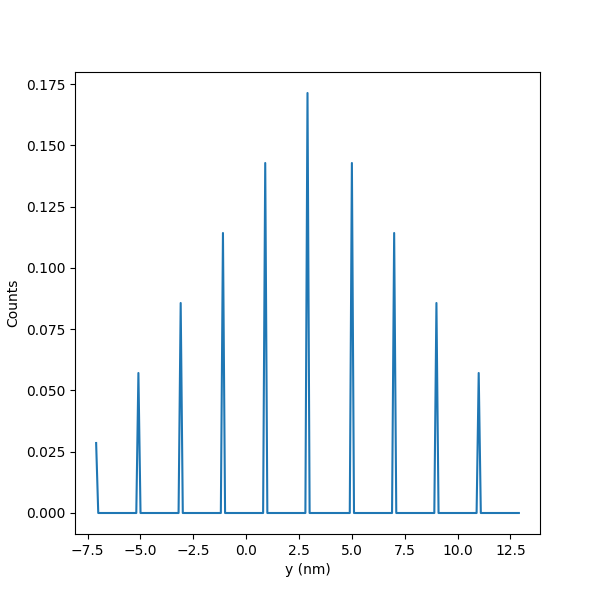

The number of ions is:  4000


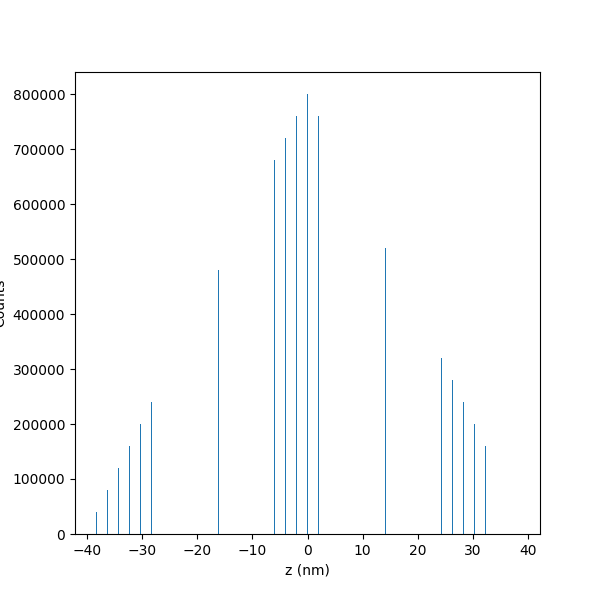

The number of ions is:  4000


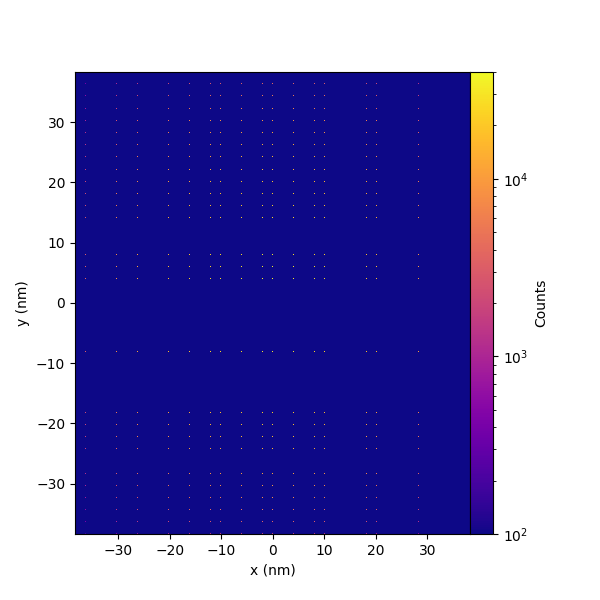

The number of ions is:  4000


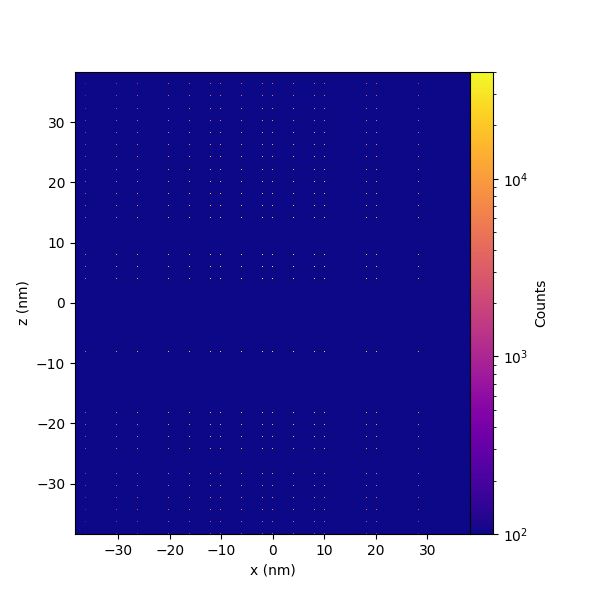

Cropping the data based on the reference point and box dimensions.
The number of ions is:  108


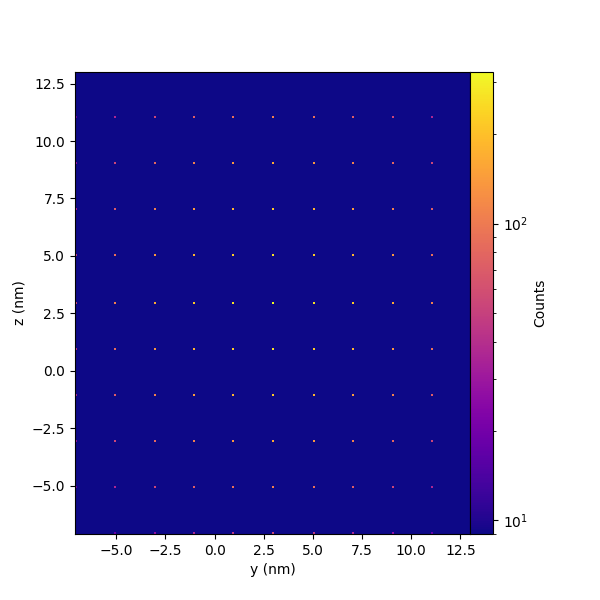

The number of ions is:  4000


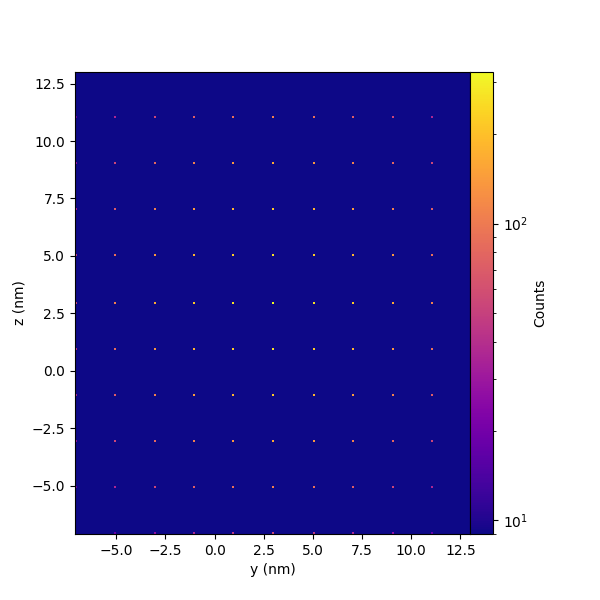

In [8]:

# compute spatial distribution map with dmax = 10 and nbins = 100
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, plot_mode='bar', plot=True,
                            histogram_type='1D', axes=['x'])
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=True, reference_point=[3,3,3],
                           reference_point_shift=True, box_dimensions=[15,15,15], plot_mode='line', plot=True,
                            histogram_type='1D', axes=['y'])
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, plot_mode='bar', plot=True,
                            histogram_type='1D', axes=['z'])
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, plot_mode='line', plot=True,
                            histogram_type='2D', axes=['x', 'y'])
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, plot=True,
                            histogram_type='2D', axes=['x', 'z'])
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, reference_point=[3,3,3],
                           reference_point_shift=True, box_dimensions=[15,15,15], plot_mode='line', plot=True,
                            histogram_type='2D', axes=['y', 'z'])

sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, reference_point=None,
                           reference_point_shift=False, box_dimensions=None, plot_mode='line', plot=True,
                            histogram_type='3D', axes=['x', 'y', 'z'])


The number of ions is:  4000


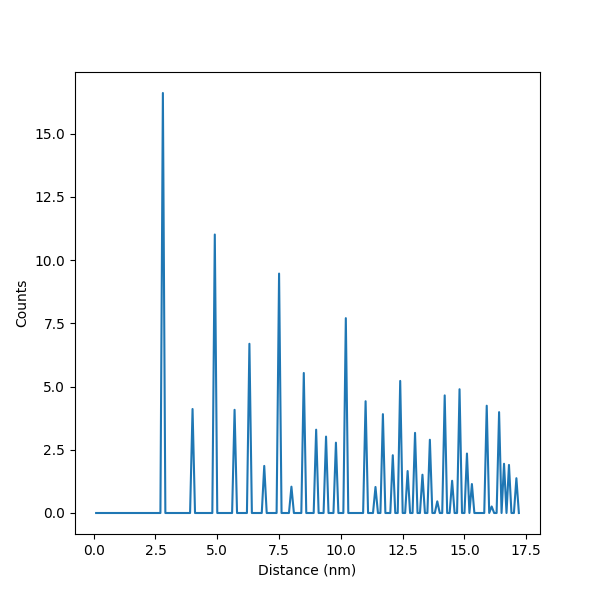

In [9]:
g_r, radii = rdf.rdf(coords, dr=0.1, variables=None, rho=None, rcutoff=0.9, eps=1e-15, normalize=True, reference_point=None,
        box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='rdf')

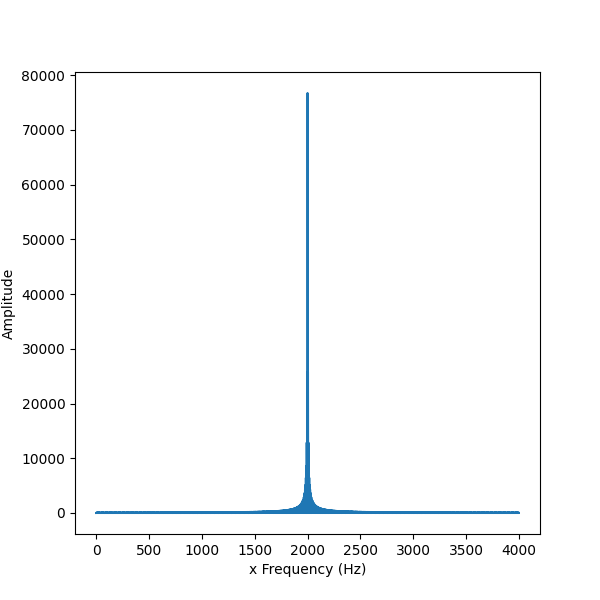

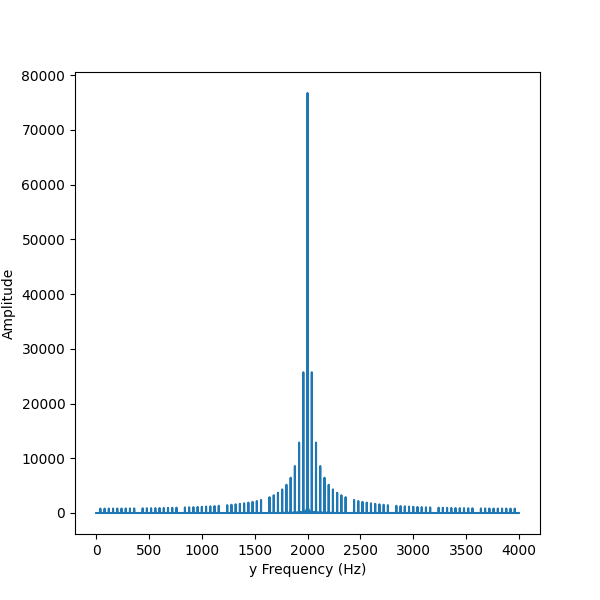

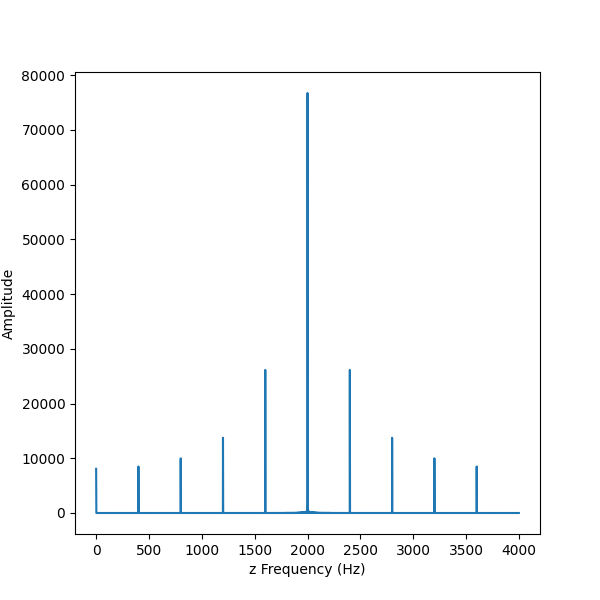

In [10]:
fft_1 = fft.fft(coords, d=0.1, variables=None, normalize=False, reference_point=None,
        box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='fft', fft_type='1d', axes=['x'])
fft_1 = fft.fft(coords, d=0.1, variables=None, normalize=False, reference_point=None,
        box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='fft', fft_type='1d', axes=['y'])
fft_1 = fft.fft(coords, d=0.1, variables=None, normalize=False, reference_point=None,
        box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='fft', fft_type='1d', axes=['z'])
# fft_1 = fft.fft(coords, d=0.1, variables=None, normalize=False, reference_point=None,
#         box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='fft', fft_type='2d', axes=['x','y'])
# fft_1 = fft.fft(coords, d=0.1, variables=None, normalize=False, reference_point=None,
#         box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='fft', fft_type='2d', axes=['x','z'])
# fft_1 = fft.fft(coords, d=0.1, variables=None, normalize=False, reference_point=None,
#         box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='fft', fft_type='2d', axes=['y','z'])
# fft_1 = fft.fft(coords, d=0.1, variables=None, normalize=False, reference_point=None,
#         box_dimensions=None, plot=True, save=False, figure_size=(6, 6), figname='fft', fft_type='3d', axes=['x','y','z'])

In [11]:
data = ccapt_tools.pos_to_ccapt('./Matrix_SDM.pos')
data

,x (nm),y (nm),z (nm),mc (Da),mc_uc (Da),high_voltage (V),pulse,t (ns),t_c (ns),x_det (cm),y_det (cm),pulse_pi,ion_pp,start_counter
0,0.0,0.0,0.0,30.957636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,0.0,0.4,0.0,31.946928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,0.0,0.8,0.0,31.097507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,0.0,1.2,0.0,30.969530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,0.0,1.6,0.0,31.033827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8783,4.8,3.4,5.0,32.012691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
8784,4.8,3.8,5.0,31.000378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
8785,4.8,4.2,5.0,31.005686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
8786,4.8,4.6,5.0,31.039989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


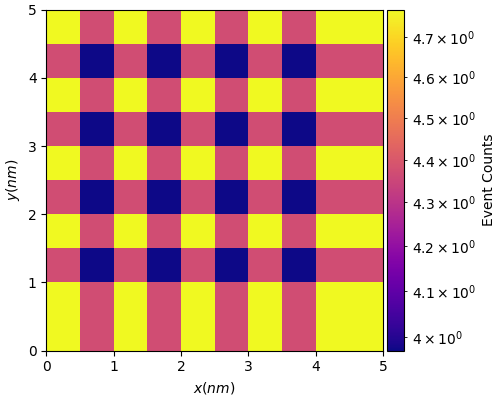

In [12]:
density_map.plot_density_map(data['x (nm)'].to_numpy(), data['y (nm)'].to_numpy(), bins=0.5, cmap='plasma')

In [231]:
data = ccapt_tools.epos_to_ccapt('T:/Monajem/APT_data/Ortner/R56_06768-v01.epos')
data

,x (nm),y (nm),z (nm),mc (Da),mc_uc (Da),high_voltage (V),pulse,t (ns),t_c (ns),x_det (cm),y_det (cm),pulse_pi,ion_pp,start_counter
0,-6.144971,11.178374,1.195138,26.978182,0.0,6306.0,1261.199951,1494.671387,0.0,-0.438439,0.742662,0,1,0
1,-3.438308,4.376252,0.225914,26.978922,0.0,6306.0,1261.199951,1501.300659,0.0,-0.294075,0.279496,77,1,0
2,-3.416219,4.216140,0.214784,27.162317,0.0,6306.0,1261.199951,1506.515747,0.0,-0.291402,0.268849,3,1,0
3,15.602643,-8.348641,2.319220,26.978527,0.0,6306.0,1261.199951,1523.911987,0.0,1.117486,-0.604245,101,1,0
4,11.830281,-6.078051,1.300404,26.980337,0.0,6306.0,1261.199951,1521.128662,0.0,0.807370,-0.439209,21,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13335550,-4.548662,-26.879885,256.886780,26.967958,0.0,7698.0,1539.599976,1347.607788,0.0,-0.165751,-1.522590,10,1,0
13335551,-20.601198,11.899602,255.776855,26.988237,0.0,7698.0,1539.599976,1334.648560,0.0,-1.098772,0.662806,57,1,0
13335552,-20.861986,11.714497,255.816956,27.001881,0.0,7698.0,1539.599976,1334.738281,0.0,-1.109465,0.652158,106,1,0
13335553,13.138130,8.050748,253.758392,26.995007,0.0,7698.0,1539.599976,1375.509033,0.0,0.727168,0.439209,169,1,0


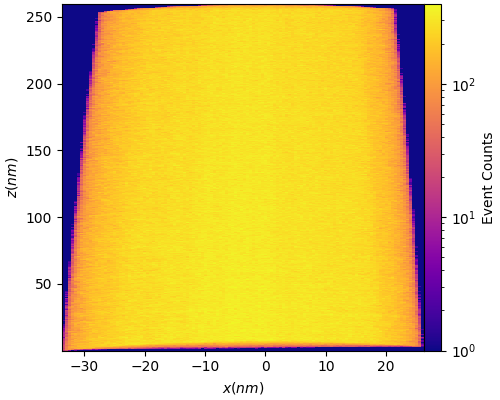

(1125841, 3)


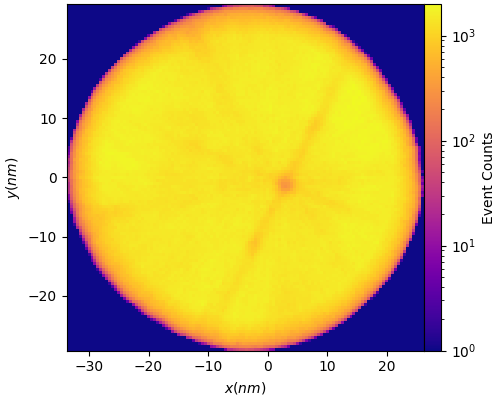

(1125841, 3)


In [62]:
density_map.plot_density_map(data['x (nm)'].to_numpy(), data['z (nm)'].to_numpy(), bins=0.5, cmap='plasma', axis=['x', 'z'])
print(coords.shape)

density_map.plot_density_map(data['x (nm)'].to_numpy(), data['y (nm)'].to_numpy(), bins=0.5, cmap='plasma')
print(coords.shape)

,x (nm),y (nm),z (nm),mc (Da),mc_uc (Da),high_voltage (V),pulse,t (ns),t_c (ns),x_det (cm),y_det (cm),pulse_pi,ion_pp,start_counter
0,0.0,0.0,0.0,30.957636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,0.0,0.4,0.0,31.946928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,0.0,0.8,0.0,31.097507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,0.0,1.2,0.0,30.969530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,0.0,1.6,0.0,31.033827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8783,4.8,3.4,5.0,32.012691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
8784,4.8,3.8,5.0,31.000378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
8785,4.8,4.2,5.0,31.005686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
8786,4.8,4.6,5.0,31.039989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [16]:
min(data['x (nm)'].to_numpy())

np.float64(0.0)

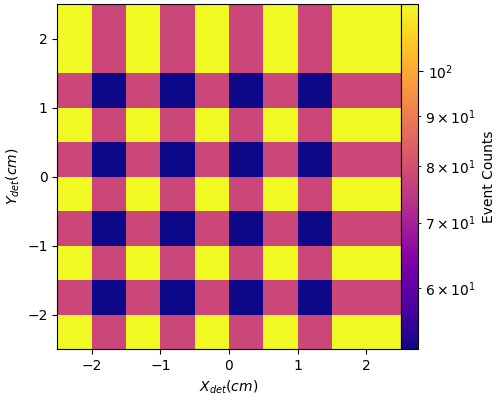

In [23]:
data_loadcrop.plot_crop_fdm(data['x (nm)'].to_numpy()-2.5, data['y (nm)'].to_numpy()-2.5, bins=0.5)

In [28]:
coords_SDM = data[['x (nm)', 'y (nm)', 'z (nm)']].to_numpy()

Cropping the data based on the reference point and box dimensions.
The number of ions is:  14


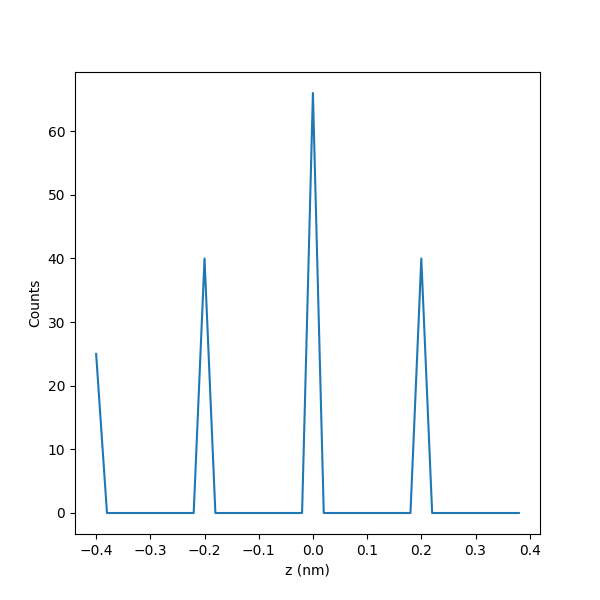

In [29]:
sdm_histogram, edges = sdm.sdm(coords_SDM, bin_size=0.02, variables=None, normalize=False, reference_point=[0,0,0],
                           reference_point_shift=True, box_dimensions=[1,1,1], plot_mode='line', plot=True,
                            histogram_type='1D', axes=['z'])

Cropping the data based on the reference point and box dimensions.
The number of ions is:  108


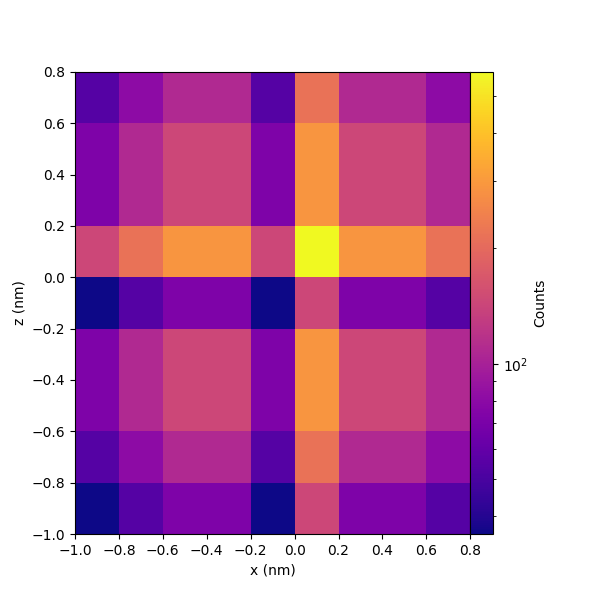

In [33]:
sdm_histogram, edges = sdm.sdm(coords_SDM, bin_size=0.2, variables=None, normalize=False, plot=True, box_dimensions=[2,2,2], reference_point=[0,0,0],
                            histogram_type='2D', axes=['x', 'z'])

In [ ]:
# compute spatial distribution map with dmax = 10 and nbins = 100
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, plot_mode='bar', plot=True,
                            histogram_type='1D', axes=['x'])
sdm_histogram, edges = sdm.sdm(coords_SDM, bin_size=0.1, variables=None, normalize=True, reference_point=[3,3,3],
                           reference_point_shift=True, box_dimensions=[15,15,15], plot_mode='line', plot=True,
                            histogram_type='1D', axes=['y'])
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, plot_mode='bar', plot=True,
                            histogram_type='1D', axes=['z'])
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, plot_mode='line', plot=True,
                            histogram_type='2D', axes=['x', 'y'])
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, plot=True,
                            histogram_type='2D', axes=['x', 'z'])
sdm_histogram, edges = sdm.sdm(coords, bin_size=0.1, variables=None, normalize=False, reference_point=[3,3,3],
                           reference_point_shift=True, box_dimensions=[15,15,15], plot_mode='line', plot=True,
                            histogram_type='2D', axes=['y', 'z'])

In [46]:
import numpy as np
import random
from tqdm import tqdm

import numpy as np

def compute_sdm(data, memory_l, memory_n, memory_id, bin_field_value, snd_value, proportion_of_ions, theta, phi, ui_table_data):
    """
    Computes the SDM based on atom data, memory, and other input parameters.
    Returns the bin edges and histograms for x, y, z.
    """
    
    # Memory 
    id_m = memory_l[:memory_n[0, memory_id], memory_id]
    
    # Boundaries for x
    x_min = np.min(data['x'][id_m])
    x_max = np.max(data['x'][id_m])
    dx = abs(x_max - x_min)
    n_stepx = int((2 * dx) // bin_field_value) + 1
    l_x = np.linspace(-dx, dx, n_stepx)
    
    # Boundaries for y
    y_min = np.min(data['y'][id_m])
    y_max = np.max(data['y'][id_m])
    dy = abs(y_max - y_min)
    n_stepy = int((2 * dy) // bin_field_value) + 1
    l_y = np.linspace(-dy, dy, n_stepy)
    
    # Boundaries for z
    z_min = -np.max(data['z'][id_m])
    z_max = np.max(data['z'][id_m])
    n_stepz = int((z_max - z_min) // bin_field_value) + 1
    l_z = np.linspace(z_min, z_max, n_stepz)
    
    # Initialize result histograms
    res_x = np.zeros((n_stepx - 1, len(ui_table_data)))
    res_y = np.zeros((n_stepy - 1, len(ui_table_data)))
    res_z = np.zeros((n_stepz - 1, len(ui_table_data)))
    res_id = []
    
    # Compute histograms for each selected atom type
    for j, selected in enumerate(ui_table_data):
        if selected[1] == 1:  # If second ion selected
            # Find the atom positions of the selected type
            id_selected = id_m[np.where(data['atid'][id_m] == j)]
            pos_selected = np.vstack((data['x'][id_selected], data['y'][id_selected], data['z'][id_selected])).T
            
            # Initialize delta arrays for shifts
            for i, pos_c in enumerate(pos_selected):
                delta = pos_c - pos_selected
                shift_x = np.cos(np.radians(theta)) * delta[:, 0] + np.sin(np.radians(theta)) * np.sin(np.radians(phi)) * delta[:, 1] + np.sin(np.radians(theta)) * np.cos(np.radians(phi)) * delta[:, 2]
                shift_y = np.cos(np.radians(phi)) * delta[:, 1] - np.sin(np.radians(phi)) * delta[:, 2]
                shift_z = -np.sin(np.radians(theta)) * delta[:, 0] + np.cos(np.radians(theta)) * np.sin(np.radians(phi)) * delta[:, 1] + np.cos(np.radians(theta)) * np.cos(np.radians(phi)) * delta[:, 2]
                
                res_x[:, j] += np.histogram(shift_x[shift_x != 0], bins=l_x)[0]
                res_y[:, j] += np.histogram(shift_y[shift_y != 0], bins=l_y)[0]
                res_z[:, j] += np.histogram(shift_z[shift_z != 0], bins=l_z)[0]
            
            res_id.append(j)
    
    return l_x, l_y, l_z, res_x, res_y, res_z, res_id



def compute(data, memory_l, memory_n, memory_id, bin_field_value, snd_value, 
            proportion_of_ions, theta, phi, ui_table_data, sdm):
    """
    Wrapper function for computing SDM. If SDM already exists, confirm overwrite.
    
    Args:
        sdm (dict): A dictionary to store SDM-related data (Lx, Ly, Lz, dx, dy, dz, Id).
        ... Other args similar to compute_sdm() ...

    Returns:
        dict: Updated SDM data after computation.
    """

    # Compute SDM
    sdm['Lx'], sdm['Ly'], sdm['Lz'], sdm['dx'], sdm['dy'], sdm['dz'], sdm['Id'] = compute_sdm(
        data, memory_l, memory_n, memory_id, bin_field_value, snd_value, 
        proportion_of_ions, theta, phi, ui_table_data)

    return sdm


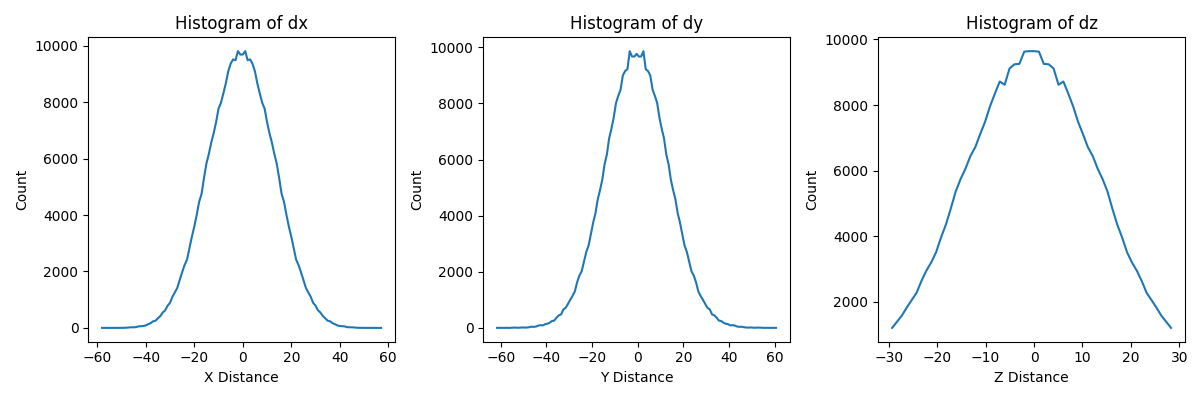

ValueError: The weights and list don't have the same length.

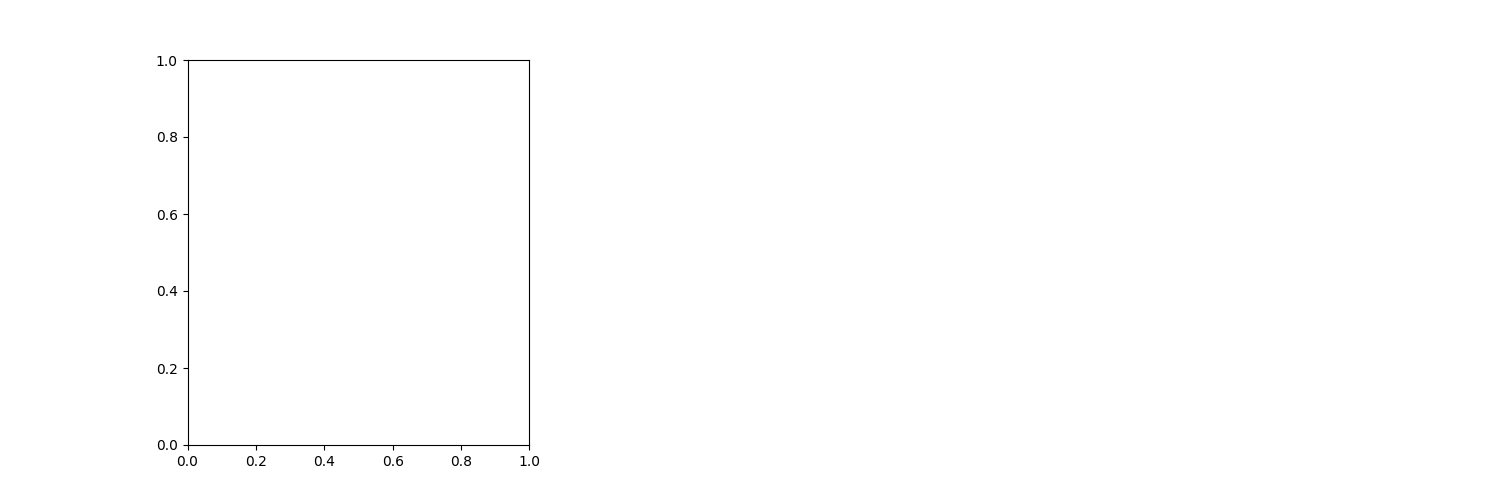

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data (this is just an example; in practice, you'd load real atom positions)
np.random.seed(0)
num_atoms = 1000
data = {
    'x': np.random.normal(0, 10, num_atoms),
    'y': np.random.normal(0, 10, num_atoms),
    'z': np.random.normal(0, 10, num_atoms),
    'atid': np.random.randint(0, 3, num_atoms)  # Assume 3 types of atoms
}

# Memory arrays, assume 1 memory bank for simplicity
memory_l = np.array([range(num_atoms)]).T  # Just use all atoms for the memory list
memory_n = np.array([[num_atoms]])  # Number of atoms
memory_id = 0

# SDM settings
bin_field_value = 1.0  # Binning resolution
snd_value = 'Split'  # Mode: 'Split' or 'Together'
proportion_of_ions = 50  # Use 50% of ions for calculation
theta = 45  # Rotation angle theta
phi = 30  # Rotation angle phi
ui_table_data = [[1, 1] for _ in range(3)]  # Assume we select all atom types (3 in this case)

# Initialize empty SDM structure
sdm = {'Lx': [], 'Ly': [], 'Lz': [], 'dx': [], 'dy': [], 'dz': [], 'Id': []}

# Compute the SDM
sdm = compute(data, memory_l, memory_n, memory_id, bin_field_value, snd_value, 
              proportion_of_ions, theta, phi, ui_table_data, sdm)

# Extract results
Lx, Ly, Lz = sdm['Lx'], sdm['Ly'], sdm['Lz']
dx, dy, dz = sdm['dx'], sdm['dy'], sdm['dz']

# Plot the 1D histograms of dx, dy, dz
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(Lx[:-1], np.sum(dx, axis=1))
plt.title('Histogram of dx')
plt.xlabel('X Distance')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.plot(Ly[:-1], np.sum(dy, axis=1))
plt.title('Histogram of dy')
plt.xlabel('Y Distance')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.plot(Lz[:-1], np.sum(dz, axis=1))
plt.title('Histogram of dz')
plt.xlabel('Z Distance')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plot the 2D histograms (dx-dy, dy-dz, dx-dz)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist2d(np.repeat(Lx[:-1], len(Ly[:-1])), np.tile(Ly[:-1], len(Lx[:-1])), 
           bins=[Lx, Ly], weights=dx.ravel(), cmap='viridis')
plt.colorbar()
plt.title('2D Histogram of dx vs dy')
plt.xlabel('X Distance')
plt.ylabel('Y Distance')

plt.subplot(1, 3, 2)
plt.hist2d(np.repeat(Ly[:-1], len(Lz[:-1])), np.tile(Lz[:-1], len(Ly[:-1])), 
           bins=[Ly, Lz], weights=dy.ravel(), cmap='plasma')
plt.colorbar()
plt.title('2D Histogram of dy vs dz')
plt.xlabel('Y Distance')
plt.ylabel('Z Distance')

plt.subplot(1, 3, 3)
plt.hist2d(np.repeat(Lx[:-1], len(Lz[:-1])), np.tile(Lz[:-1], len(Lx[:-1])), 
           bins=[Lx, Lz], weights=dz.ravel(), cmap='inferno')
plt.colorbar()
plt.title('2D Histogram of dx vs dz')
plt.xlabel('X Distance')
plt.ylabel('Z Distance')

plt.tight_layout()
plt.show()
